In [1]:
import pandas as pd 
import numpy as np
import os
from os.path import join 
from sklearn.model_selection import train_test_split

DATA = "./"
SHIP_DIR = "/media/shivam/DATA/airbus-tracking/"
TRAIN_IMAGE_DIR = os.path.join(SHIP_DIR, "train_v2")

use_csv = False
min_ship_count = 4 
def sample_ships(in_df, base_rep_val=1500):
    if in_df['ships'].values[0]==0:
        return in_df.sample(base_rep_val//3) # even more strongly undersample no ships
    else:
        return in_df.sample(base_rep_val, replace=(in_df.shape[0]<base_rep_val))

# if use_csv: 
#     balanced_train_df = pd.read_csv(join(DATA, 'balanced_train_df.csv'))
#     balanced_valid_df = pd.read_csv(join(DATA, 'balanced_train_df.csv'))

# else:

# 1. Get unique_img_ids
masks = pd.read_csv(os.path.join(SHIP_DIR, 'train_ship_segmentations_v2.csv'))
masks['ships'] = masks['EncodedPixels'].map(lambda c_row: 1 if isinstance(c_row, str) else 0)
unique_img_ids = masks.groupby('ImageId').agg({'ships': 'sum'}).reset_index()
unique_img_ids['has_ship'] = unique_img_ids['ships'].map(lambda x: 1.0 if x>0 else 0.0)
unique_img_ids['has_ship_vec'] = unique_img_ids['has_ship'].map(lambda x: [x])
# some files are too small/corrupt
print("Removing small files")
unique_img_ids['file_size_kb'] = unique_img_ids['ImageId'].map(lambda c_img_id: 
                                                                os.stat(os.path.join(TRAIN_IMAGE_DIR, 
                                                                                    c_img_id)).st_size/1024)
unique_img_ids = unique_img_ids[unique_img_ids['file_size_kb']>50] # keep only 50kb files
masks.drop(['ships'], axis=1, inplace=True)

# Step2 : Splitting on the basis of unique_img_ids
print ('unique_img_ids : ', unique_img_ids.columns)
train_ids, valid_ids = train_test_split(unique_img_ids, 
                    test_size = 0.3, 
                    stratify = unique_img_ids['ships'])


train_df = pd.merge(masks, train_ids)
valid_df = pd.merge(masks, valid_ids)

print("Grouping ships")
# train_df['grouped_ship_count'] = train_df['ships'].map(lambda x: (x+1)//2)
# valid_df['grouped_ship_count'] = valid_df['ships'].map(lambda x: (x+1)//2)

# balanced_train_df = train_df.groupby('grouped_ship_count').apply(sample_ships)
# balanced_valid_df = valid_df.groupby('grouped_ship_count').apply(sample_ships)



Removing small files
Grouping ships


In [4]:
import sys
sys.path.append("../")
from src.utils import *
import matplotlib.pyplot as plt
import skimage.io

In [20]:
masks_tmp = pd.read_csv(os.path.join(SHIP_DIR, 'train_ship_segmentations_v2.csv'))
masks_tmp[masks_tmp['ImageId'] == '00021ddc3.jpg']


,ImageId,EncodedPixels
9,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...
10,00021ddc3.jpg,101361 1 102128 3 102896 4 103663 6 104430 9 1...
11,00021ddc3.jpg,74441 3 75207 5 75975 5 76743 5 77511 5 78280 ...
12,00021ddc3.jpg,74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...
13,00021ddc3.jpg,150423 2 151190 3 151958 3 152726 4 153495 3 1...
14,00021ddc3.jpg,139644 2 140408 6 141174 9 141942 9 142711 6 1...
15,00021ddc3.jpg,75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...
16,00021ddc3.jpg,86727 2 87493 4 88261 4 89030 3 89798 4 90566 ...
17,00021ddc3.jpg,95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...


In [21]:
masks_tmp['ships'] = masks_tmp['EncodedPixels'].map(lambda c_row: 1 if isinstance(c_row, str) else 0)
masks_tmp[masks_tmp['ImageId'] == '00021ddc3.jpg']

,ImageId,EncodedPixels,ships
9,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...,1
10,00021ddc3.jpg,101361 1 102128 3 102896 4 103663 6 104430 9 1...,1
11,00021ddc3.jpg,74441 3 75207 5 75975 5 76743 5 77511 5 78280 ...,1
12,00021ddc3.jpg,74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...,1
13,00021ddc3.jpg,150423 2 151190 3 151958 3 152726 4 153495 3 1...,1
14,00021ddc3.jpg,139644 2 140408 6 141174 9 141942 9 142711 6 1...,1
15,00021ddc3.jpg,75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...,1
16,00021ddc3.jpg,86727 2 87493 4 88261 4 89030 3 89798 4 90566 ...,1
17,00021ddc3.jpg,95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...,1


In [22]:
unique_img_ids_tmp = masks_tmp.groupby('ImageId').agg({'ships': 'sum'}).reset_index()
unique_img_ids_tmp[unique_img_ids_tmp['ImageId'] == '00021ddc3.jpg']

,ImageId,ships
5,00021ddc3.jpg,9


In [37]:
train_ids_tmp, valid_ids_tmp = train_test_split(unique_img_ids_tmp, 
                    test_size = 0.3, 
                    stratify = unique_img_ids_tmp['ships'])

train_df_tmp = pd.merge(masks_tmp, train_ids_tmp, on='ImageId')
valid_df_tmp = pd.merge(masks_tmp, valid_ids_tmp, on='ImageId')

In [38]:
display(masks_tmp[masks_tmp['ImageId'] == '00021ddc3.jpg'])
display(unique_img_ids_tmp[unique_img_ids_tmp['ImageId'] == '00021ddc3.jpg'])
display(valid_df_tmp[valid_df_tmp['ImageId'] == '00021ddc3.jpg'])
display(train_df_tmp[train_df_tmp['ImageId'] == '00021ddc3.jpg'])

print ('======================')
display(train_ids_tmp[train_ids_tmp['ImageId'] == '00021ddc3.jpg'])
display(valid_ids_tmp[valid_ids_tmp['ImageId'] == '00021ddc3.jpg'])

,ImageId,EncodedPixels,ships
9,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...,1
10,00021ddc3.jpg,101361 1 102128 3 102896 4 103663 6 104430 9 1...,1
11,00021ddc3.jpg,74441 3 75207 5 75975 5 76743 5 77511 5 78280 ...,1
12,00021ddc3.jpg,74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...,1
13,00021ddc3.jpg,150423 2 151190 3 151958 3 152726 4 153495 3 1...,1
14,00021ddc3.jpg,139644 2 140408 6 141174 9 141942 9 142711 6 1...,1
15,00021ddc3.jpg,75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...,1
16,00021ddc3.jpg,86727 2 87493 4 88261 4 89030 3 89798 4 90566 ...,1
17,00021ddc3.jpg,95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...,1


,ImageId,ships
5,00021ddc3.jpg,9


,ImageId,EncodedPixels,ships_x,ships_y
0,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...,1,9
1,00021ddc3.jpg,101361 1 102128 3 102896 4 103663 6 104430 9 1...,1,9
2,00021ddc3.jpg,74441 3 75207 5 75975 5 76743 5 77511 5 78280 ...,1,9
3,00021ddc3.jpg,74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...,1,9
4,00021ddc3.jpg,150423 2 151190 3 151958 3 152726 4 153495 3 1...,1,9
5,00021ddc3.jpg,139644 2 140408 6 141174 9 141942 9 142711 6 1...,1,9
6,00021ddc3.jpg,75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...,1,9
7,00021ddc3.jpg,86727 2 87493 4 88261 4 89030 3 89798 4 90566 ...,1,9
8,00021ddc3.jpg,95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...,1,9


,ImageId,EncodedPixels,ships_x,ships_y


,ImageId,ships


,ImageId,ships
5,00021ddc3.jpg,9


,ImageId,EncodedPixels,ships_x,ships_y
0,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...,1,9
1,00021ddc3.jpg,101361 1 102128 3 102896 4 103663 6 104430 9 1...,1,9
2,00021ddc3.jpg,74441 3 75207 5 75975 5 76743 5 77511 5 78280 ...,1,9
3,00021ddc3.jpg,74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...,1,9
4,00021ddc3.jpg,150423 2 151190 3 151958 3 152726 4 153495 3 1...,1,9
5,00021ddc3.jpg,139644 2 140408 6 141174 9 141942 9 142711 6 1...,1,9
6,00021ddc3.jpg,75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...,1,9
7,00021ddc3.jpg,86727 2 87493 4 88261 4 89030 3 89798 4 90566 ...,1,9
8,00021ddc3.jpg,95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...,1,9


[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
Unique: [0 1]


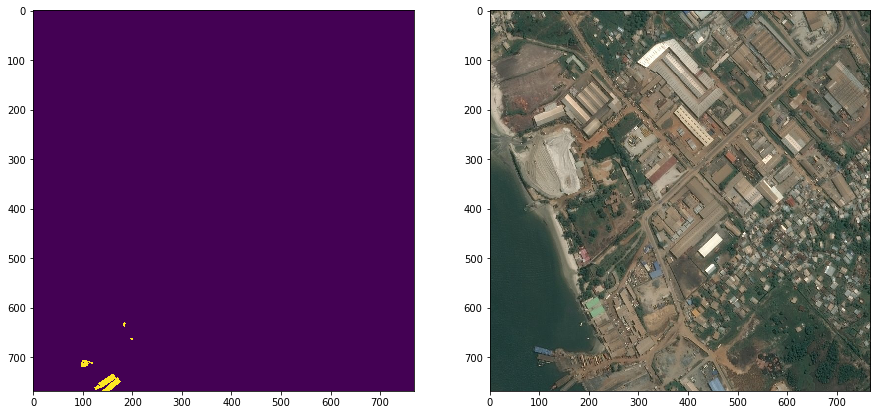

In [41]:
im_name ="00021ddc3.jpg" 
temp_df = valid_df_tmp[valid_df_tmp["ImageId"] == im_name]
display(temp_df)
a_temp  = temp_df["EncodedPixels"].tolist()

image = skimage.io.imread(os.path.join(TRAIN_IMAGE_DIR,im_name))
f, axarr = plt.subplots(1, 2, figsize = (15, 15))
axarr[0].imshow(masks_as_image(a_temp, verbose = 1)[:, :, 0])
axarr[1].imshow(image)

In [16]:
temp_df.columns

Index(['ImageId', 'EncodedPixels', 'ships', 'has_ship', 'has_ship_vec',
       'file_size_kb', 'grouped_ship_count'],
      dtype='object')

9
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


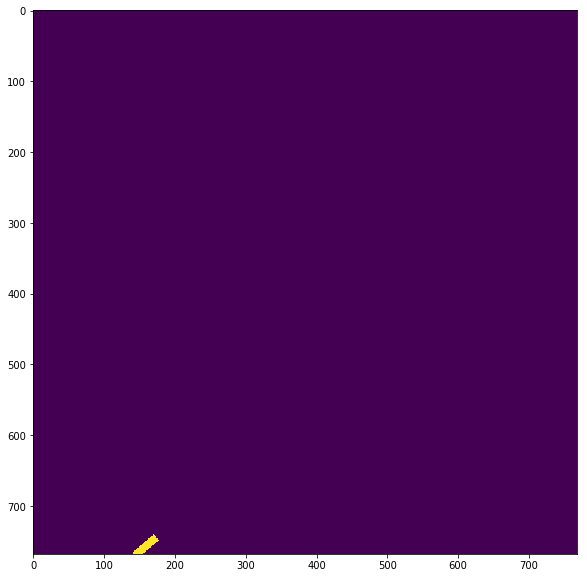

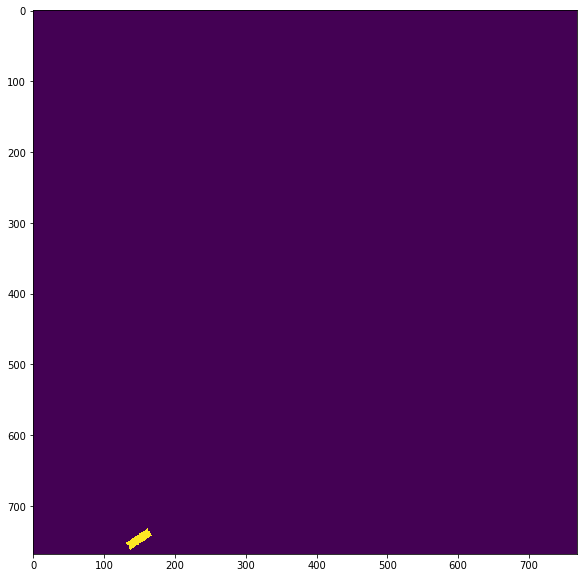

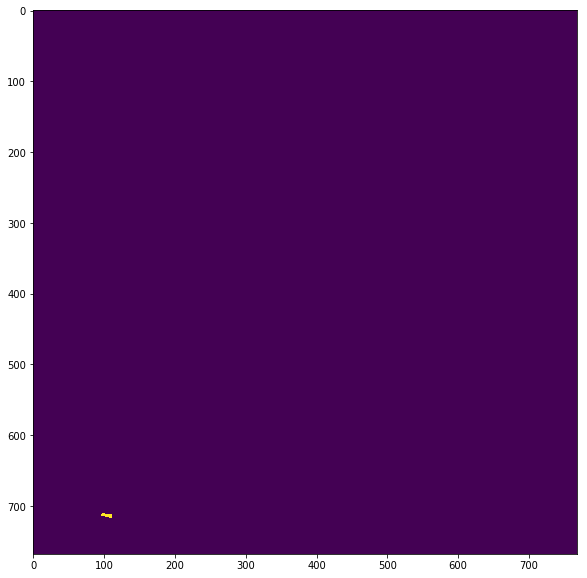

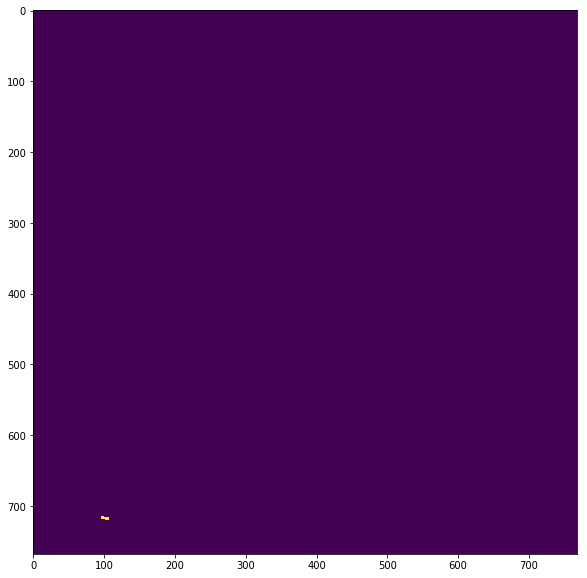

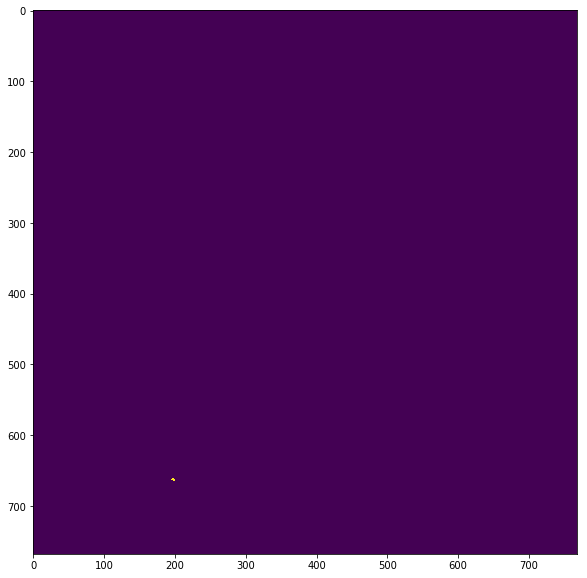

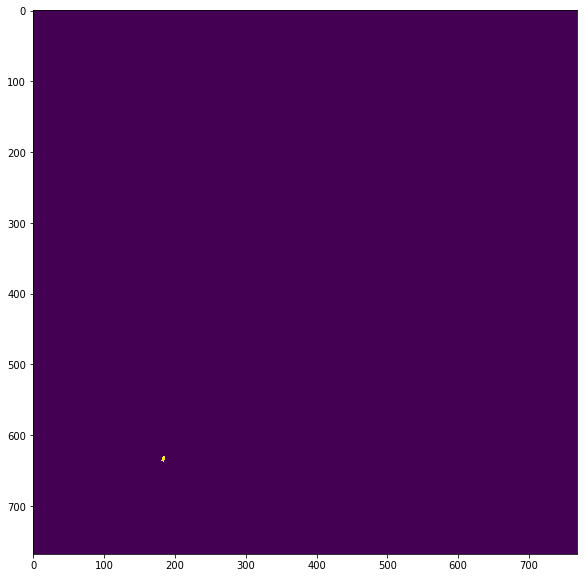

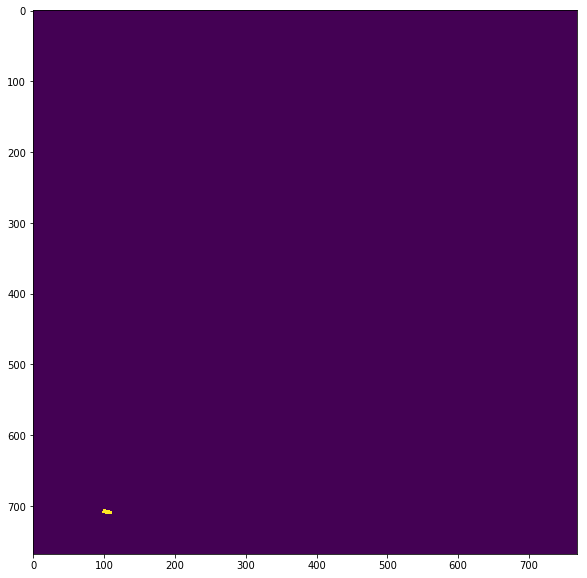

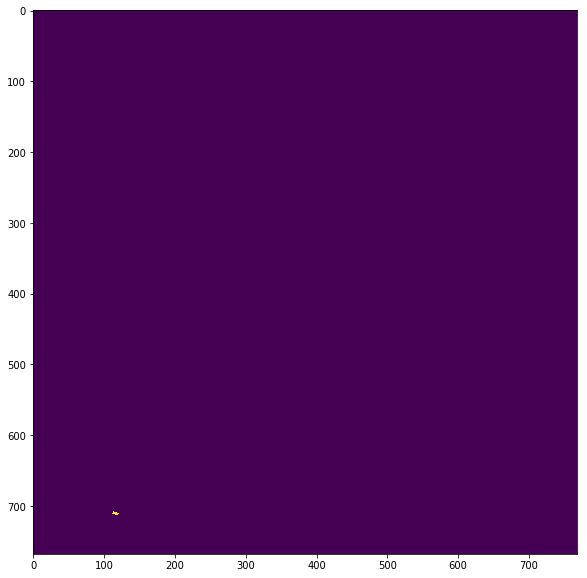

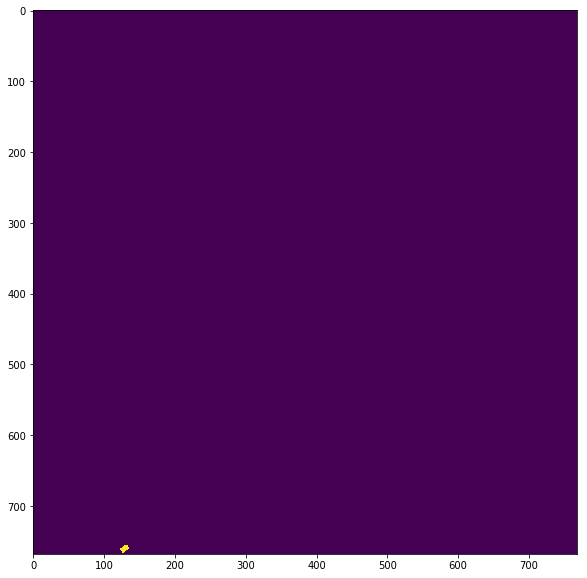

In [42]:
%matplotlib inline
all_masks = np.zeros((768, 768), dtype = np.int16)
#if isinstance(in_mask_list, list):
print(len(a_temp))
for i, mask in enumerate(a_temp):
    if isinstance(mask, str):
        mask_decode = rle_decode(mask)
        f, axarr = plt.subplots(1, 1, figsize=(10, 10))
        axarr.imshow(mask_decode)
#         plt.show()
        
#         all_masks += 
# return np.expand_dims(all_masks, -1)

In [42]:
from collections import Counter
mask = list(masks_as_image(a_temp)[:, :, 0].flatten())
Counter(mask)
# mask

Counter({0: 587894, 1: 1930})

In [24]:
len(a_temp)

14

In [6]:
balanced_train_df_group = balanced_train_df.groupby('ImageId').count()
balanced_valid_df_group = balanced_valid_df.groupby('ImageId')

In [7]:
balanced_train_df

In [ ]:
balanced_train_df.to_csv(join(DATA, "balanced_train_df.csv"), index=False)
balanced_valid_df.to_csv(join(DATA, "balanced_valid_df.csv"), index=False)

# TRAINING 
filename_train = join(DATA, 'balanced_train_df_shipgt_{0}.csv'.format(min_ship_count))
if not os.path.exists(filename_train):
    print("Creating new csv files")
    ourBalanced_train_df = balanced_train_df[balanced_train_df['grouped_ship_count'] >= min_ship_count]
    ourBalanced_train_df.to_csv(filename_train, index=False)

# VALIDATION
filename_validation = join(DATA, 'balanced_valid_df_shipgt_{0}.csv'.format(min_ship_count))  
if not os.path.exists(filename_validation):
    ourBalanced_valid_df = balanced_valid_df[balanced_valid_df['grouped_ship_count'] >= min_ship_count]
    ourBalanced_valid_df.to_csv(filename_validation, index=False)

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
Unique: [0 1]


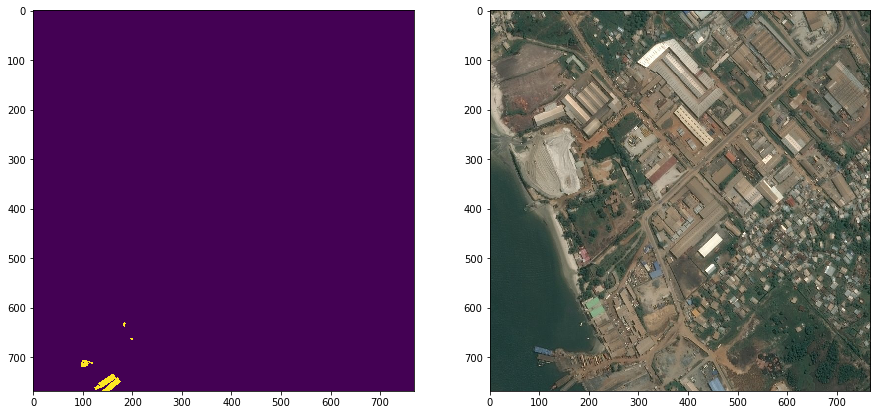

In [49]:
train_df = pd.read_csv("balanced_train_df_shipgt_4.csv")
valid_df = pd.read_csv("balanced_valid_df_shipgt_4.csv")

im_name ="00021ddc3.jpg" 
temp_df =train_df[train_df["ImageId"] == im_name]
a_temp  = temp_df["EncodedPixels"].tolist()

image = skimage.io.imread(os.path.join(TRAIN_IMAGE_DIR,im_name))
f, axarr = plt.subplots(1, 2, figsize = (15, 15))
axarr[0].imshow(masks_as_image(a_temp, verbose = 1)[:, :, 0])
axarr[1].imshow(image)